# Advanced EDA: Financial (Time Series) Data
**Dr. Dave Wanik - University of Connecticut**

-------------------------------------------------
Time series data behaves a little different than a regular structured dataset. Let's look at a snapshot of AAPL's stock price data - which is a very clean dataset allowing you to focus more on feature engineering than dirty data.

By the end of this, you should feel comfortable visualizing time series data and manipulating it so much that you have the confidence to build your own stock trading algorithm!

## Load AAPL Dataset
First, mount your Drive and then read in the AAPL dataset.

<center>

![apple logo](https://pbs.twimg.com/profile_images/1283958620359516160/p7zz5dxZ.jpg)

In [4]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

You can access the data from here:
* [AAPL.csv](https://drive.google.com/file/d/1FRi1h2abOk4CEFbpjj4czHtBzYl1vNcW/view?usp=sharing)

In [3]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [6]:
# https://drive.google.com/file/d/1FRi1h2abOk4CEFbpjj4czHtBzYl1vNcW/view?usp=sharing
!gdown 1FRi1h2abOk4CEFbpjj4czHtBzYl1vNcW

Downloading...
From: https://drive.google.com/uc?id=1FRi1h2abOk4CEFbpjj4czHtBzYl1vNcW
To: /content/AAPL.csv
100% 666k/666k [00:00<00:00, 35.1MB/s]


In [9]:
# read in some data
df = pd.read_csv("AAPL.csv")
# df = pd.read_csv("/content/drive/MyDrive/Online Materials/Module 2: Dirty Data and Parametric Models/Week 1: Advanced EDA/data/AAPL.csv")

In [10]:
# see what the data looks like
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


Let's look at the data types - whenever we have a time series dataset, you should ensure all time-related variables are stored as a datetime object.

In [11]:
df.info() # right now it looks like 'Date' is stored as an object... let's fix that!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9848 non-null   object 
 1   Open       9847 non-null   float64
 2   High       9847 non-null   float64
 3   Low        9847 non-null   float64
 4   Close      9847 non-null   float64
 5   Adj Close  9847 non-null   float64
 6   Volume     9847 non-null   float64
dtypes: float64(6), object(1)
memory usage: 538.7+ KB


Convert the 'Date' column to be a datetime object so we can manipulate it.

In [12]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info() # better!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9848 non-null   datetime64[ns]
 1   Open       9847 non-null   float64       
 2   High       9847 non-null   float64       
 3   Low        9847 non-null   float64       
 4   Close      9847 non-null   float64       
 5   Adj Close  9847 non-null   float64       
 6   Volume     9847 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 538.7 KB


Let's see what this looks like in the data.

In [13]:
df.head(n=10) # inspect the first ten rows - not much has changed
                  # but you will see the power soon enough!

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0
5,1980-12-19,0.504464,0.506696,0.504464,0.504464,0.400656,12157600.0
6,1980-12-22,0.529018,0.531250,0.529018,0.529018,0.420157,9340800.0
7,1980-12-23,0.551339,0.553571,0.551339,0.551339,0.437885,11737600.0
8,1980-12-24,0.580357,0.582589,0.580357,0.580357,0.460931,12000800.0
9,1980-12-26,0.633929,0.636161,0.633929,0.633929,0.503479,13893600.0


## Data Summary
Compute summary statistics on the dataset and look at the correlation in the dataset. This is a pandas function that presents useful summary statistics for min, max, mean, median, quantiles, sd etc. Can be used on a series or a dataframe.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [14]:
# Statistic Summary
# example on a dataframe
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9847.000000,9847.000000,9847.000000,9847.000000,9847.000000,9.847000e+03
mean,30.971548,31.267553,30.666651,30.977288,28.993430,8.605793e+07
std,54.780774,55.258075,54.319836,54.814548,53.029434,8.617441e+07
min,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1.064286,1.087500,1.044643,1.067857,0.916318,3.307895e+07
50%,1.714286,1.750000,1.678571,1.718750,1.457793,5.778220e+07
75%,32.500715,32.784287,32.093570,32.500714,28.278903,1.074654e+08
max,296.239990,300.600006,295.190002,300.350006,300.350006,1.855410e+09


This is the raw price data - which is OK - but later on if we convert this to 'percentage change' or 'difference' we will likely be able to discern better insights. We can do this later on after we ensure missing values are handled!

## Missing Values
Time series data can be especially problematic if there is missing data - here is how you can check the count of missing values per column.

In our dataset, it looks like there is one suspicious row.

In [15]:
# count any missing values
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Let's drop all rows where at least one entry is missing per row.

In [16]:
# Drop the missing value and reset index
print(df.shape)
df.dropna(inplace=True)
print(df.shape) # see how this has one less row?!

(9848, 7)
(9847, 7)


One less row (9848 vs. 9847 rows).

# Feature Engineering
Once your data is in pandas, you can do A LOT of interesting temporal feature engineering.

## Day of Week

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html

In [17]:
# since these are temporal data, make a timerange dataframe, and join the data,
# to make sure you have all the days you think you do
# if you don't, you need to interpolate!

In [18]:
# add a column for day of week
df['DayOfWeek'] = df['Date'].dt.day_name()

In [19]:
# see what you did!
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday


# Parsing the date into simpler variables
Once you have your 'base' column in the proper datetime format, let it rip! I always do this right out the the gate so I have more buckets or dimensions to analyze my data.

In [20]:
# let's make some new columns for month, day and year
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday,12,12,1980
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday,12,15,1980
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday,12,16,1980
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday,12,17,1980
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday,12,18,1980


## diff() and pct_change()
You can set the date as the index if you want, but so long as your data are in order (like ours are), you can calcuate the raw and percentage difference between the previous rows.

This of course will leave you with an NaN in the top row, but that's fine! We will just drop that first row afterwards (we have a ton of data and don't need it). As the analyst, you get to decide how to treat the data.

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html

Works for series or dataframes!

In [21]:
# make a new column for RawChange for 'Adj Close' and populate it
df['RawChange'] = df['Adj Close'].diff()
df.head(n=5) # see how the stock price changed by 2 cents?

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year,RawChange
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday,12,12,1980,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday,12,15,1980,-0.021274
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday,12,16,1980,-0.028365
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday,12,17,1980,0.008864
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday,12,18,1980,0.010637


In [22]:
# make a new column for PctChange for 'Adj Close' and populate it
df['PctChange'] = df['Adj Close'].pct_change()
df.head(n=5)

,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year,RawChange,PctChange
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday,12,12,1980,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday,12,15,1980,-0.021274,-0.052175
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday,12,16,1980,-0.028365,-0.073395
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday,12,17,1980,0.008864,0.024752
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday,12,18,1980,0.010637,0.028986


# Visualization
Time series data is often best described as a line plot. You can use `matplotlib` directly, or many times, you can just use `pandas` (which is what I do)!

* https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html
* https://stackoverflow.com/questions/37581145/connect-line-of-scatter-plot-on-pandas-dataframe

## df['Adj Close'] - line plot

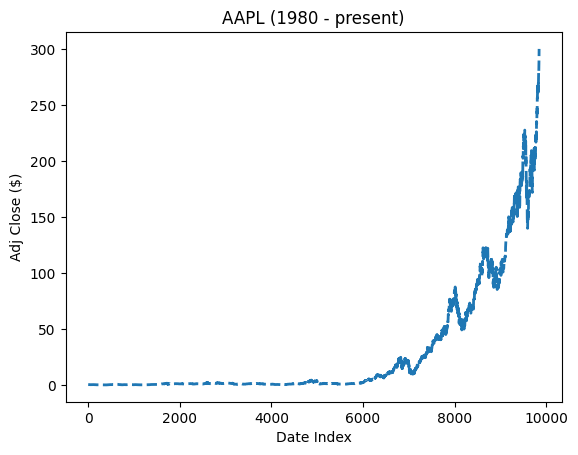

In [23]:
# make a line plot with matplotlib
fig, ax = plt.subplots()
line1 = ax.plot(df['Adj Close'], '--', linewidth=2)
ax.set_title('AAPL (1980 - present)')
ax.set_xlabel('Date Index')
ax.set_ylabel('Adj Close ($)')
plt.show()

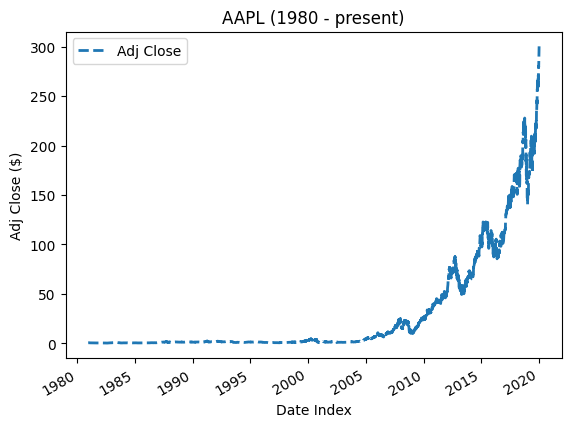

In [24]:
# make a line plot with pandas (controls matplotlib behind the scenes)
df.plot.line(x = 'Date', y = 'Adj Close', linewidth=2, style='--')
plt.title('AAPL (1980 - present)')
plt.xlabel('Date Index')
plt.ylabel('Adj Close ($)')
plt.show()

A small cosmetic note - df.plot.line() makes a LINE plot, and df.plot.scatter() makes a SCATTERPLOT. You can connect the lines on a line plot, but not on a scatterplot if you are using `pandas`.

## df['PctChange'] - line plot

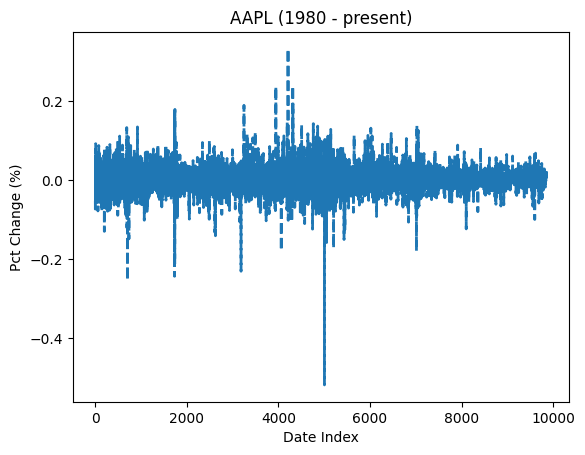

In [25]:
# make a line plot with matplotlib
fig, ax = plt.subplots()
line1 = ax.plot(df['PctChange'], '--', linewidth=2)
ax.set_title('AAPL (1980 - present)')
ax.set_xlabel('Date Index')
ax.set_ylabel('Pct Change (%)')
plt.show()

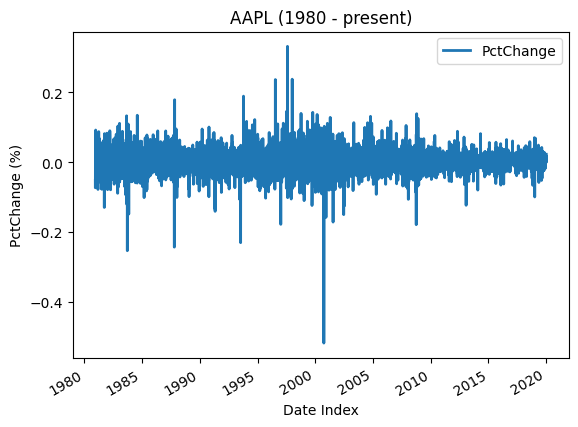

In [26]:
# make a line plot with pandas (controls matplotlib behind the scenes)
df.plot.line(x = 'Date', y = 'PctChange', linewidth=2)
plt.title('AAPL (1980 - present)')
plt.xlabel('Date Index')
plt.ylabel('PctChange (%)')
plt.show()

## Grouped Histogram
Let's see if day of week has any bearing on how stock prices change (for AAPL).

`seaborn` is another plotting library you may enjoy - the syntax can be much easier (just like `plotly`). Try this out!

In [27]:
# import modules
import seaborn as sns

<ipython-input-28-93486dec5d91>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='PctChange', x='DayOfWeek',


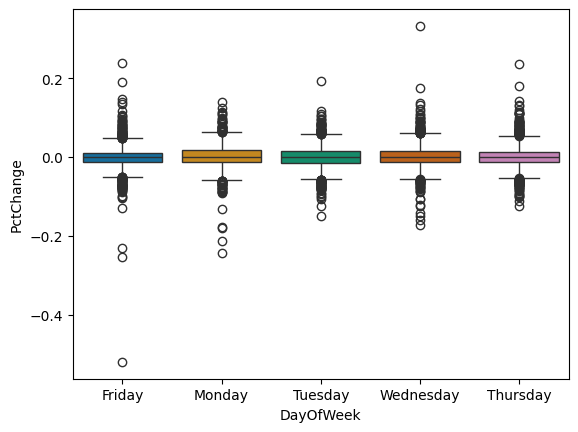

In [28]:
sns.boxplot(y='PctChange', x='DayOfWeek',
                 data=df,
                 palette="colorblind")
plt.show() # get rid of extra text

This is a little tough to see right away... but we will find an easier way shortly with the `sign` function! At least we can see more general trends than `pct_change`.

In [29]:
# summary stats be group
g= df.groupby('DayOfWeek').describe()
g

Open                                                      \
            count       mean        std       min       25%       50%   
DayOfWeek                                                               
Friday     1968.0  31.164899  55.002041  0.203125  1.062500  1.723214   
Monday     1864.0  30.836672  54.897120  0.207589  1.061250  1.694643   
Thursday   1980.0  31.088538  54.898971  0.198661  1.073392  1.724464   
Tuesday    2018.0  30.950550  54.828185  0.207589  1.062500  1.714286   
Wednesday  2017.0  30.813705  54.344982  0.205357  1.071429  1.705357   

                                    High             ... RawChange             \
                 75%         max   count       mean  ...       75%        max   
DayOfWeek                                            ...                        
Friday     34.501430  291.119995  1968.0  31.425796  ...  0.029561   7.520370   
Monday     30.422500  289.459991  1864.0  31.174626  ...  0.047235   7.631027   
Thursday   34.023928  296.239990  1980.0  31.362037  ...  0.036901   6.856674   
Tuesday    32.182144  289.929993  2018.0  31.261218  ...  0.040689   8.464600   
Wednesday  32.128571  279.799988  2017.0  31.112621  ...  0.042884  10.967224   

          PctChange                                                    \
              count      mean       std       min       25%       50%   
DayOfWeek                                                               
Friday       1967.0 -0.000735  0.029563 -0.518692 -0.013182  0.000000   
Monday       1864.0  0.001467  0.028476 -0.243523 -0.013606  0.001513   
Thursday     1980.0  0.001408  0.028487 -0.123558 -0.012719  0.000000   
Tuesday      2018.0  0.000962  0.027445 -0.148812 -0.013786  0.000000   
Wednesday    2017.0  0.002328  0.029095 -0.171713 -0.012719  0.000256   

                               
                75%       max  
DayOfWeek                      
Friday     0.011595  0.238094  
Monday     0.016871  0.139050  
Thursday   0.014169  0.237037  
Tuesday    0.015261  0.192913  
Wednesday  0.016510  0.332279  

[5 rows x 88 columns]

## Plotting Data for a Specified Time Range
Let's try to look at a month of data

### December 2019 only
Subset December 2019 and plot.

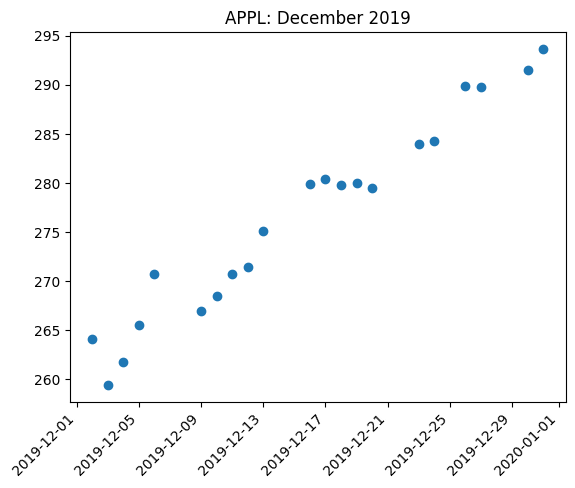

In [30]:
# some more dates functionality
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# subset just december 2019
dec2019 = df[(df['Date'] >= '2019-12-01') & (df['Date'] <= '2019-12-31')]
# show it as a scatterplot
fig, ax = plt.subplots()
ax.scatter(y=dec2019["Adj Close"], x=dec2019["Date"])
ax.set_title("APPL: December 2019")
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

### November 2019 only
Subset November 2019 data only and plot it.

Same code as before, just change the color and some variable names!

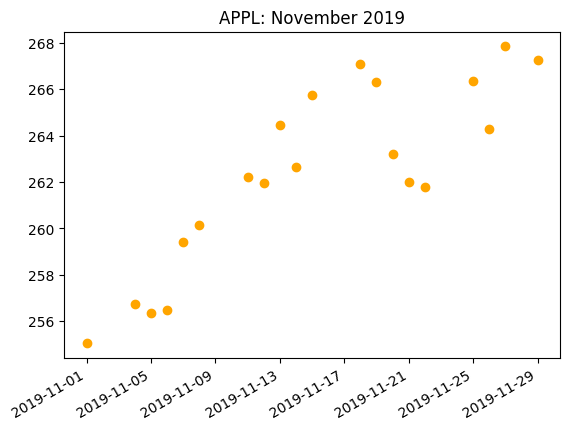

In [31]:
# subset just nov 2019 (try it on your own?)
nov2019 = df[(df['Date'] >= '2019-11-01') & (df['Date'] <= '2019-11-30')]
# show it as a scatterplot
fig, ax = plt.subplots()
ax.scatter(y=nov2019["Adj Close"], x=nov2019["Date"], color="orange")
ax.set_title("APPL: November 2019")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()

### Subplots (Side by Side)

First, we can show an example with 'Date' as the X axis. I think it looks a little cramped...

<ipython-input-32-a46d5018c268>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(nov2019["Date"], nov2019["Adj Close"], 'ko-', color="cornflowerblue")
<ipython-input-32-a46d5018c268>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(dec2019["Date"], dec2019["Adj Close"], 'ko-', color="orange")


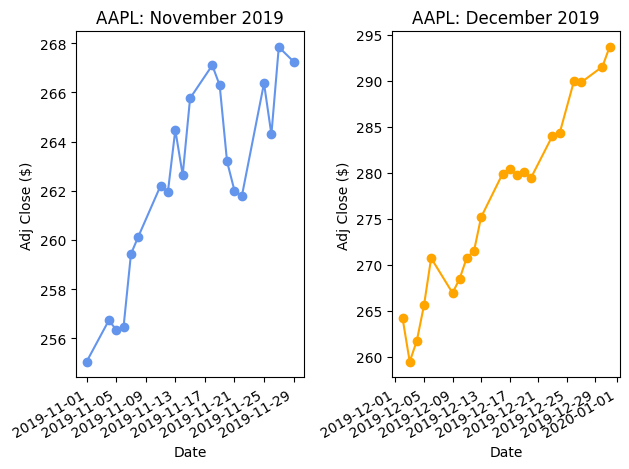

In [32]:
# plots side by side
import numpy as np
import matplotlib.pyplot as plt


plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.plot(nov2019["Date"], nov2019["Adj Close"], 'ko-', color="cornflowerblue")
plt.title('AAPL: November 2019')
plt.ylabel('Adj Close ($)')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.plot(dec2019["Date"], dec2019["Adj Close"], 'ko-', color="orange")
plt.title('AAPL: December 2019')
plt.ylabel('Adj Close ($)')
plt.xlabel('Date')
ax.format_xdata = mdates.DateFormatter('%d')
plt.gcf().autofmt_xdate()

# limit the overlap!
plt.tight_layout()
plt.show()

Since we are dealing with a month of data, why not just use the 'Day' column we generated earlier on? Looks cleaner.

<ipython-input-33-2ea2b1a330b1>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(nov2019['Day'], nov2019["Adj Close"], 'ko-', color="cornflowerblue")
<ipython-input-33-2ea2b1a330b1>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(dec2019['Day'], dec2019["Adj Close"],  'ko-', color="orange")


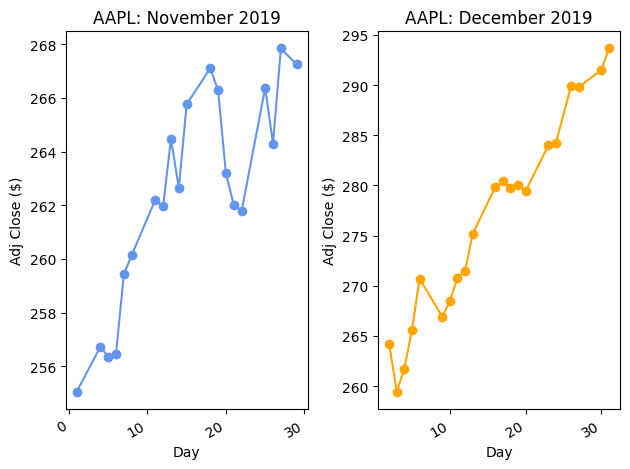

In [33]:
# now look at our labels
# plots side by side
import numpy as np
import matplotlib.pyplot as plt

# subset months for 2019
nov2019 = df[(df['Date'] >= '2019-11-01') & (df['Date'] <= '2019-11-30')]
dec2019 = df[(df['Date'] >= '2019-12-01') & (df['Date'] <= '2019-12-31')]

plt.subplot(1, 2, 1)
plt.plot(nov2019['Day'], nov2019["Adj Close"], 'ko-', color="cornflowerblue")
plt.title('AAPL: November 2019')
plt.ylabel('Adj Close ($)')
plt.xlabel('Day')
plt.gcf().autofmt_xdate()

plt.subplot(1, 2, 2)
plt.plot(dec2019['Day'], dec2019["Adj Close"],  'ko-', color="orange")
plt.title('AAPL: December 2019')
plt.ylabel('Adj Close ($)')
plt.xlabel('Day')
ax.format_xdata = mdates.DateFormatter('%d')
plt.gcf().autofmt_xdate()

# limit the overlap!
plt.tight_layout()
plt.show()


If you are looking for some more customization for dates and other time series data, check out this link:
* https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/


# Make the Date as an Index
When you specify a column in your dataframe as the index, it goes into the index (no more 0, 1, 2, 3.... now it's dates!) There are benefits to setting a primary key as the index. There's other functionality within `pandas` that you can leverage later on - such as time series interpolation and data selection (will show you how to do this at the bottom!)

In [34]:
# if we wanted to, we can make the date an index
# link: https://stackoverflow.com/questions/37610983/how-set-column-as-date-index

# set the index
df.set_index('Date', inplace=True)

# don't forget to say inplace=True or else it won't really update!

# don't run this cell twice - once it's the index, you delete the column
# and you can't reference it any more!

In [35]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year,RawChange,PctChange
Date,,,,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday,12,12,1980,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday,12,15,1980,-0.021274,-0.052175
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday,12,16,1980,-0.028365,-0.073395
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday,12,17,1980,0.008864,0.024752
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday,12,18,1980,0.010637,0.028986


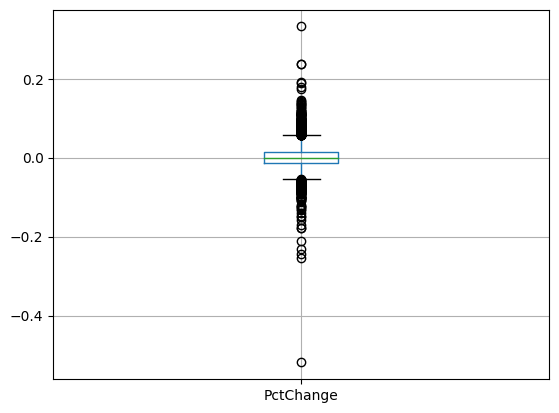

In [36]:
# boxplots
boxplot = df.boxplot(column=['PctChange'])

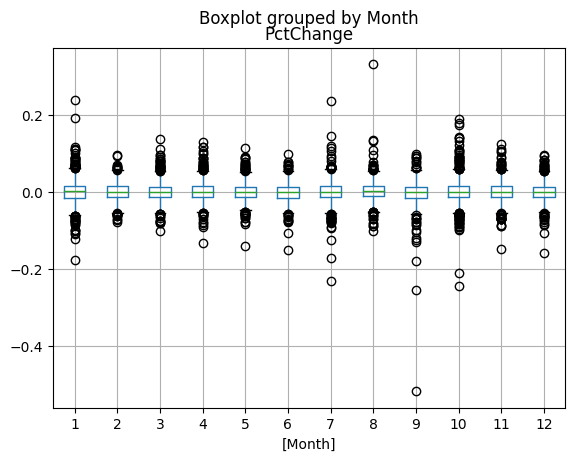

In [37]:
# more interesting to look at closes by month
#link: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.boxplot.html
df.boxplot(column=['PctChange'], by=['Month'])
plt.show()

It looks a little bit flat to me... perhaps we can do some more feature engineering to see if things pop.

# The Sign Function (-1, 0, 1)
There is no 'sign' function in `pandas`, but we can easily access it within `numpy`.

I like to use it for counting consecutive values in a row (more on that in a later lecture). For now, it's similar to a binary recoding, except you can have a value for 0 if no change.

<center>

![sign function math](https://wikimedia.org/api/rest_v1/media/math/render/svg/f8374ef8411ba954fb2655992b6e4496b8710cd6)

</center>

The sign function takes on a value of -1 is less than 0, 1 if greater than 0, and 0 if equal to 0.

<center>

![sign function](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Signum_function.svg/600px-Signum_function.svg.png)



In [38]:
# intro to the sign function
# link: https://stackoverflow.com/questions/37377478/filling-a-dataframe-with-sign-numbers
'''
another way you could do this is with recoding values
zeros would be left in place... we could sum up by month...
see which months are most profitable in terms of quantity?

df[df > 0] = 1
df[df < 0] = -1
'''
df['TheSign'] = np.sign(df['PctChange'])
df.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year,RawChange,PctChange,TheSign
Date,,,,,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0,Friday,12,12,1980,NaN,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0,Monday,12,15,1980,-0.021274,-0.052175,-1.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0,Tuesday,12,16,1980,-0.028365,-0.073395,-1.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0,Wednesday,12,17,1980,0.008864,0.024752,1.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0,Thursday,12,18,1980,0.010637,0.028986,1.0


See the NaN in the first row? This is OK for now... if you don't like it or if you are getting errors from missing values, just DROP it! Many ways you can do this, I like this to just drop the first row.

In [39]:
print(df.shape) # before
df = df[1:] # return everything after the first row
print(df.shape) # after.. we dropped another row!

(9847, 13)
(9846, 13)


Let's manipulate our sign function and aggregate the resultant values to tell an interesting story with data.

In [40]:
# we could sum 'TheSign' by group since it's a a bunch of -1 and 1's
tmpdata = df.groupby("Month")["TheSign"].sum()
tmpdata.head

<bound method NDFrame.head of Month
1     59.0
2     43.0
3      4.0
4     12.0
5      8.0
6    -49.0
7     26.0
8     97.0
9    -10.0
10    53.0
11    17.0
12     6.0
Name: TheSign, dtype: float64>

Just based on this binary flag, I'd say it's a great time to buy in January and August and a bad time to buy in June!

## Visualization with the Sign function
Let's see if we can tell a better story than just the simple table... how about a bar plot?

In [41]:
tmp = df.groupby("Month")["TheSign"].agg(['mean','std','sum'])
tmp

,mean,std,sum
Month,,,
1,0.073110,0.980382,59.0
2,0.057487,0.979391,43.0
3,0.004689,0.983420,4.0
4,0.014888,0.981709,12.0
5,0.009697,0.980342,8.0
6,-0.058753,0.981290,-49.0
7,0.031515,0.979883,26.0
8,0.112399,0.977768,97.0
9,-0.012642,0.980747,-10.0


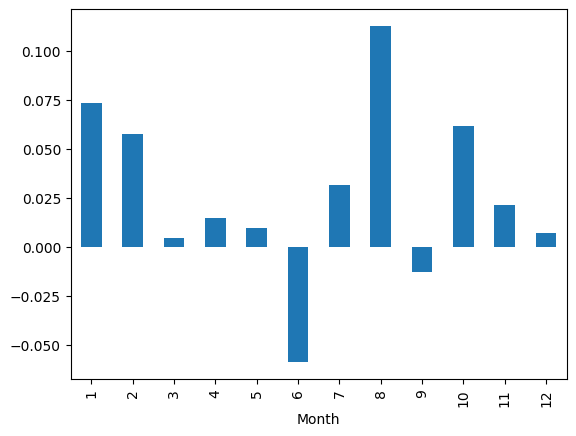

In [42]:
tmp['mean'].plot.bar()
plt.show()

In [43]:
# we could sum by two groups, but we need square brackets
# link: https://www.firstpythonnotebook.org/groupby/

# this link has some great links for a "first" Jupyter notebook

tmpdata = df.groupby(["Month", "Year"])["TheSign"].sum()
tmpdata = pd.DataFrame(tmpdata)
tmpdata # notice that this now becomes the index

TheSign
Month Year         
1     1981     -7.0
      1982      0.0
      1983      7.0
      1984      2.0
      1985      0.0
...             ...
12    2015    -10.0
      2016      6.0
      2017     -1.0
      2018     -3.0
      2019      9.0

[470 rows x 1 columns]

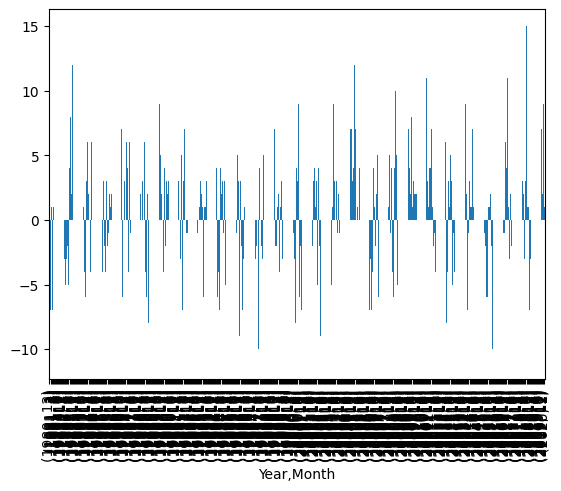

In [44]:
# any months or time periods look good to you?
df.groupby(['Year', 'Month'])['TheSign'].sum().plot.bar()
plt.show()

Woof! That X axis looks like garbage. Let's clean it up. Requires a little more work.

In [45]:
tmp = df.groupby(['Year', 'Month'])['TheSign'].sum()
tmp

Year  Month
1980  12       4.0
1981  1       -7.0
      2        1.0
      3       -7.0
      4        1.0
              ... 
2019  9        2.0
      10       7.0
      11       2.0
      12       9.0
2020  1        1.0
Name: TheSign, Length: 470, dtype: float64

In [46]:
type(tmp) # this is a pandas series, let's convert to dataframe

pandas.core.series.Series

In [47]:
tmp = pd.DataFrame(tmp)
tmp

TheSign
Year Month         
1980 12         4.0
1981 1         -7.0
     2          1.0
     3         -7.0
     4          1.0
...             ...
2019 9          2.0
     10         7.0
     11         2.0
     12         9.0
2020 1          1.0

[470 rows x 1 columns]

EVERYTHING plays nicer in a dataframe - when it doubt, get it in a dataframe.

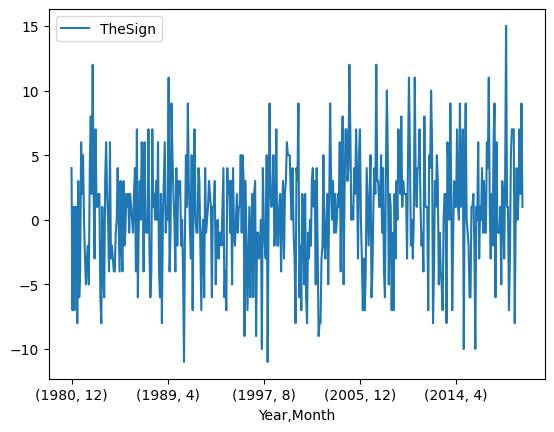

In [48]:
tmp.plot()
plt.show()

**Fun!** By having the date column as the index (even if it's a multi-index), plotting becomes MUCH CLEANER.

Say this out loud - ALWAYS KEEP YOUR DATA IN A DATAFRAME (because then you can leverage all of the functionality of a pandas dataframe).

You can update the code above and look at `pct_change` instead of the `sign` function.

# Rolling Averages (Moving Averages)
A rolling average is just then average of the past $N$ observations.

Folks in the finance industry have all sorts of rules for buying and selling stocks where the $X$ day and $Y$ day moving averages cross.

You can generalize what I show you here and come up with various trading rules you'd like to pursue.

In [49]:
# rolling averages
# link: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

# let's look at 2018 to present for this
# link: https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates

# this code won't work because date is an INDEX!
#data18and19 = mydata[(mydata['Date'] >= '2018-01-01') & (mydata['Date'] <= '2019-12-15')]

# try something like this:
# link: https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates
newdata = df.loc['2018-01-01':'2019-12-31',:]
newdata.head()

# let's add a moving average column (5 day)
newdata['FiveDayAvg'] = newdata['PctChange'].expanding(min_periods=5).mean()
newdata['HundredDayAvg'] = newdata['PctChange'].expanding(min_periods=100).mean()
newdata.head(n=10)

<ipython-input-49-a8f209dd3e59>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['FiveDayAvg'] = newdata['PctChange'].expanding(min_periods=5).mean()
<ipython-input-49-a8f209dd3e59>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdata['HundredDayAvg'] = newdata['PctChange'].expanding(min_periods=100).mean()


,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Day,Year,RawChange,PctChange,TheSign,FiveDayAvg,HundredDayAvg
Date,,,,,,,,,,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.199890,25555900.0,Tuesday,1,2,2018,2.940994,0.017905,1.0,NaN,NaN
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.170776,29517900.0,Wednesday,1,3,2018,-0.029114,-0.000174,-1.0,NaN,NaN
2018-01-04,172.539993,173.470001,172.080002,173.029999,167.947266,22434600.0,Thursday,1,4,2018,0.776490,0.004645,1.0,NaN,NaN
2018-01-05,173.440002,175.369995,173.050003,175.000000,169.859406,23660000.0,Friday,1,5,2018,1.912140,0.011385,1.0,NaN,NaN
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.228500,20567800.0,Monday,1,8,2018,-0.630906,-0.003714,-1.0,0.006009,NaN
2018-01-09,174.550003,175.059998,173.410004,174.330002,169.209091,21584000.0,Tuesday,1,9,2018,-0.019409,-0.000115,-1.0,0.004989,NaN
2018-01-10,173.160004,174.300003,173.000000,174.289993,169.170258,23959900.0,Wednesday,1,10,2018,-0.038833,-0.000229,-1.0,0.004243,NaN
2018-01-11,174.589996,175.490005,174.490005,175.279999,170.131180,18667700.0,Thursday,1,11,2018,0.960922,0.005680,1.0,0.004423,NaN
2018-01-12,176.179993,177.360001,175.649994,177.089996,171.888031,25418100.0,Friday,1,12,2018,1.756851,0.010326,1.0,0.005079,NaN


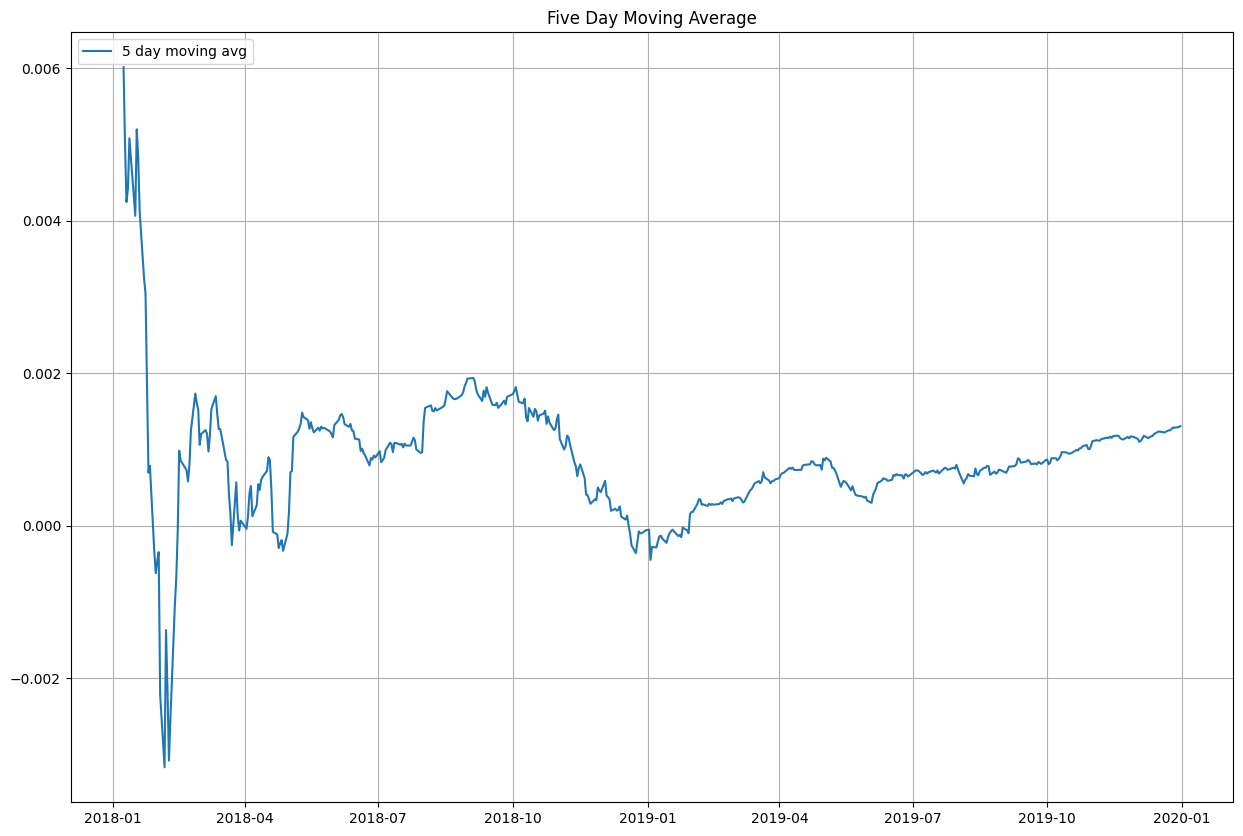

In [50]:
# make a nice plot of a 5 day moving average
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(newdata['FiveDayAvg'],label='5 day moving avg')
plt.title("Five Day Moving Average")
plt.legend(loc=2)

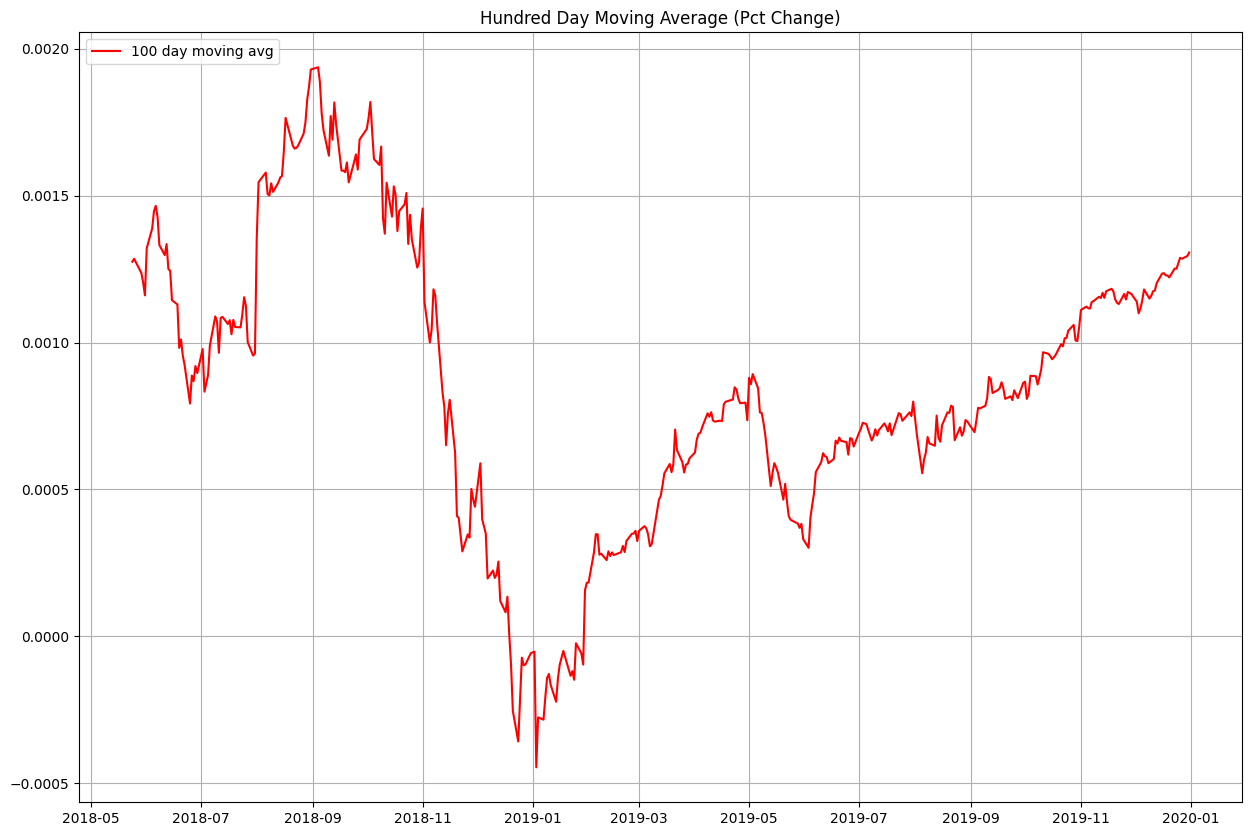

In [51]:
# make a nice plot of a 100 day moving average
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(newdata['HundredDayAvg'],label='100 day moving avg', color="red")
plt.title("Hundred Day Moving Average (Pct Change)")
plt.legend(loc=2)
plt.show()

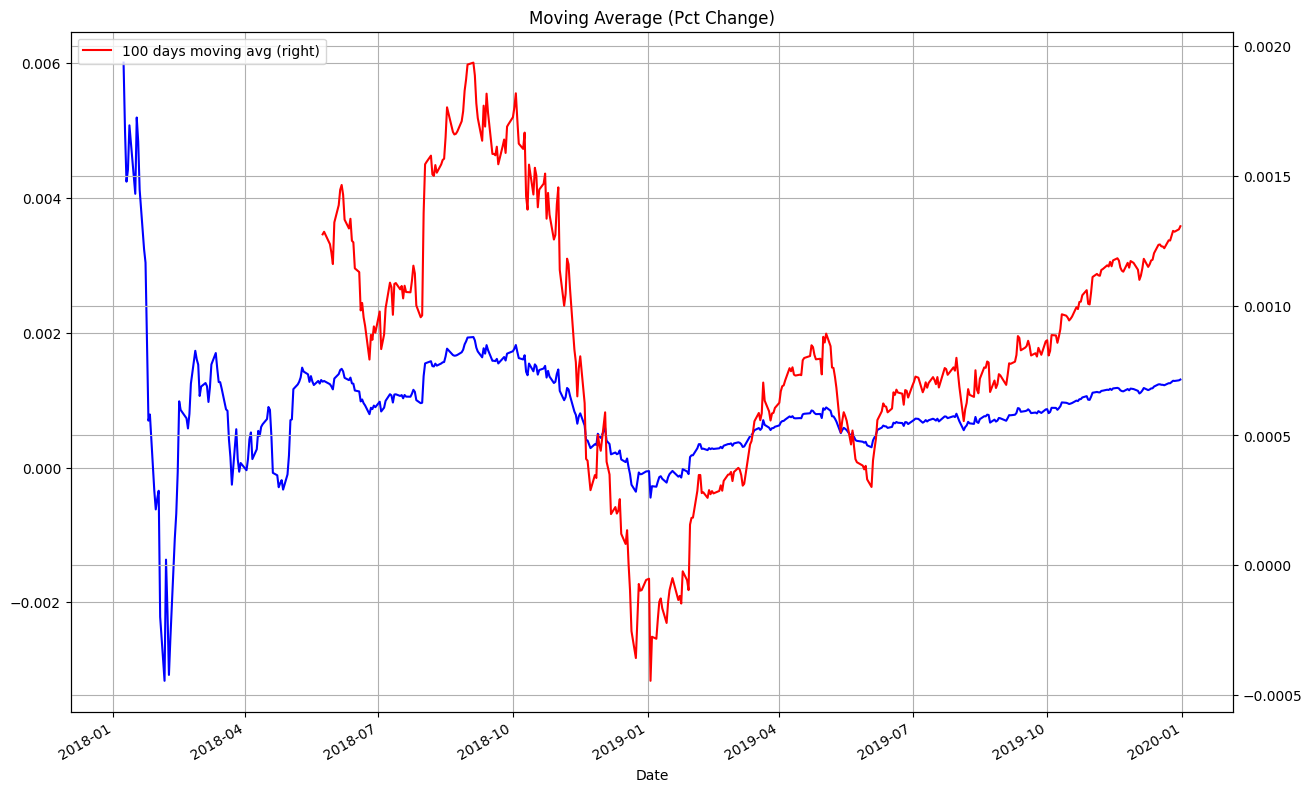

In [52]:
# Note that they have different y-axis

plt.figure(figsize=[15,10])
plt.grid(True)
ax1 = newdata.FiveDayAvg.plot(color='blue', grid=True, label='5 days moving avg')
ax2 = newdata.HundredDayAvg.plot(color='red', grid=True, secondary_y=True, label='100 days moving avg')

plt.title("Moving Average (Pct Change)")
plt.legend(loc=2)
plt.show()

The longer the moving average, the smoother the trend is and the less susceptible it is to shocks. And vice versa.

# Conclusion
Time series data is not so scary - esepcially when it's clean. In future lectures, we will learn how to interpolate a time series with lots of missing values.

Now, take everything you've learned and go build a rules-based stock trading algorithm!